**Importing libraries**

In [1]:
import numpy as np
from scipy.signal import butter, lfilter, iirnotch, firwin, convolve, freqz 
import matplotlib.pyplot as plt

**Signal Parameters**

In [2]:
# Setting signal parameters
fs = 1000 # Sampling frequency in Hz
T = 1 / fs # Period in seconds
t = np.arange(0, 1, T) # Time vector from 0 to 1 second with a resolution of T

**Filters Parameters**

In [3]:
# Filter parameters
cutoff_freq_lpf = 100
cutoff_freq_notch = 50
cutoff_freq_hpf = 1
Q_notch = 30

**Signals for testing**

In [4]:
# Frequency of the sinusoidal signals in Hz
f_signal1 = 50
f_signal2 = 150
f_signal3 = 250

# Creation of the sinusoidal signal
signal1 = np.sin(2 * np.pi * f_signal1 * t)
signal2= np.sin(2 * np.pi * f_signal2 * t)
signal3 = np.sin(2 * np.pi * f_signal3 * t)
combined_signal = signal1 + signal2 + signal3

# Added Gaussian noise to the signal
noise_amplitude = 0.1 # Noise amplitude
noise = np.random.normal(0, noise_amplitude, len(t))
signal2_with_noise = signal2 + noise

# FFT of the signals
fft_signal1 = np.fft.fft(signal1)
fft_signal2 = np.fft.fft(signal2)
fft_signal3 = np.fft.fft(signal3)
fft_combined_signal = np.fft.fft(combined_signal)
fft_signal2_with_noise = np.fft.fft(signal2_with_noise)

**Filters Design**

In [5]:
# IIR Butterworth filter
# Function to create the low pass filter
def butter_lowpass(cutoff, fs, order=5):
     nyquist = 0.5 * fs
     normal_cutoff = cutoff / nyquist
     b, a = butter(order, normal_cutoff, btype='low', analog=False)
     return b, a

# Function to apply low pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
     b, a = butter_lowpass(cutoff, fs, order=order)
     y = lfilter(b, a, data)
     return y


# FIR
# Function to create the low-pass filter
def fir_lowpass(cutoff, fs, num_taps=101):
    # Calculate the normalized cutoff frequency
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    
    # Design FIR filter coefficients using Blackman window
    taps = firwin(num_taps, normal_cutoff, window='blackman')
    return taps

def fir_lowpass_filter(data, filter_taps):
    # Apply the FIR filter to the input data
    filtered_data = convolve(data, filter_taps, mode='same')
    return filtered_data

# HIGH PASS FILTERS
def fir_highpass(cutoff, fs, num_taps=101):
    # Calculate the normalized cutoff frequency
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    
    # Design FIR filter coefficients using Blackman window
    taps = firwin(num_taps, normal_cutoff, window='blackman', pass_zero=False)
    return taps

def fir_highpass_filter(data, filter_taps):
    # Apply the FIR filter to the input data
    filtered_data = convolve(data, filter_taps, mode='same')
    return filtered_data


""" # Function to create the notch filter
def notch_filter(data, cutoff, Q_notch, fs):
    nyquist = 0.5 * fs
    freq = cutoff / nyquist
    b, a = iirnotch(freq, Q_notch)
    filtered_data = lfilter(b, a, data)
    return filtered_data """

def notch(cutoff, fs, num_taps=101, beta=8):
    # Calculate the normalized cutoff frequency
    nyquist = 0.5 * fs
    freq = cutoff / nyquist
    
    # Design FIR filter coefficients using Kaiser window
    taps = firwin(num_taps, [freq - 0.05, freq + 0.05], pass_zero=False, fs=fs, window='blackman')
    return taps

def notch_filter(data, filter_taps):
    # Apply the FIR filter to the input data
    filtered_data = convolve(data, filter_taps, mode='same')
    return filtered_data

**Filtering - Low-Pass**

In [6]:
# IIR Butterworth filter
filtered_signal2_lpf = butter_lowpass_filter(signal2, cutoff_freq_lpf, fs)
filtered_signal2_with_noise_lpf = butter_lowpass_filter(signal2_with_noise, cutoff_freq_lpf, fs)
filtered_signal3_lpf = butter_lowpass_filter(signal3, cutoff_freq_lpf, fs)
filtered_combined_signal_lpf = butter_lowpass_filter(combined_signal, cutoff_freq_lpf, fs)

# Compute FFT of the filtered signals
fft_filtered_signal2_lpf = np.fft.fft(filtered_signal2_lpf)
fft_filtered_signal2_with_noise_lpf = np.fft.fft(filtered_signal2_with_noise_lpf)
fft_filtered_signal3_lpf = np.fft.fft(filtered_signal3_lpf)
fft_filtered_combined_signal_lpf = np.fft.fft(filtered_combined_signal_lpf)


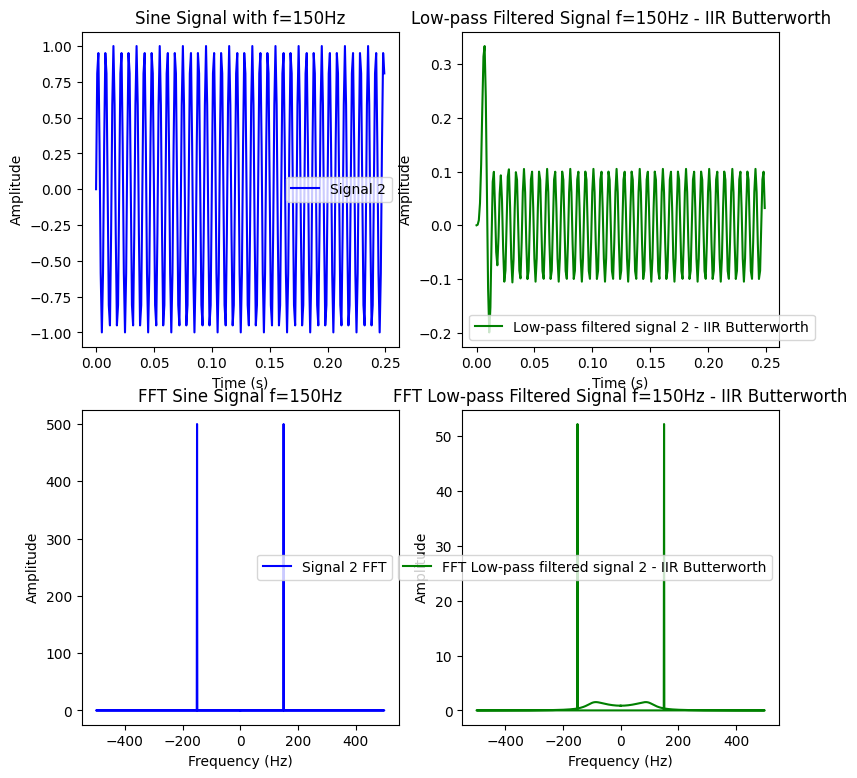

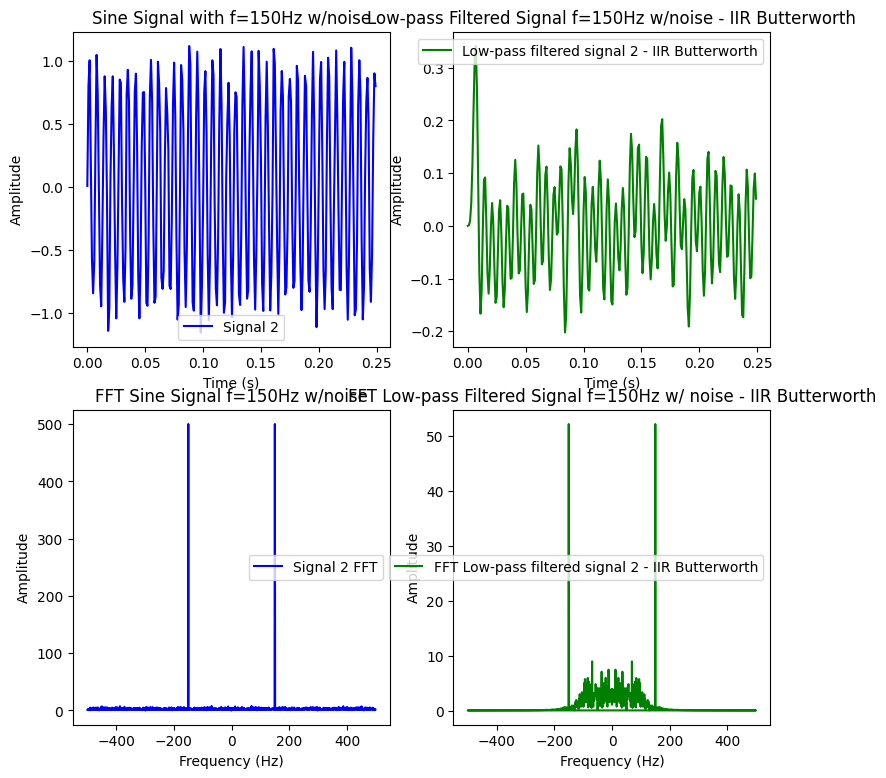

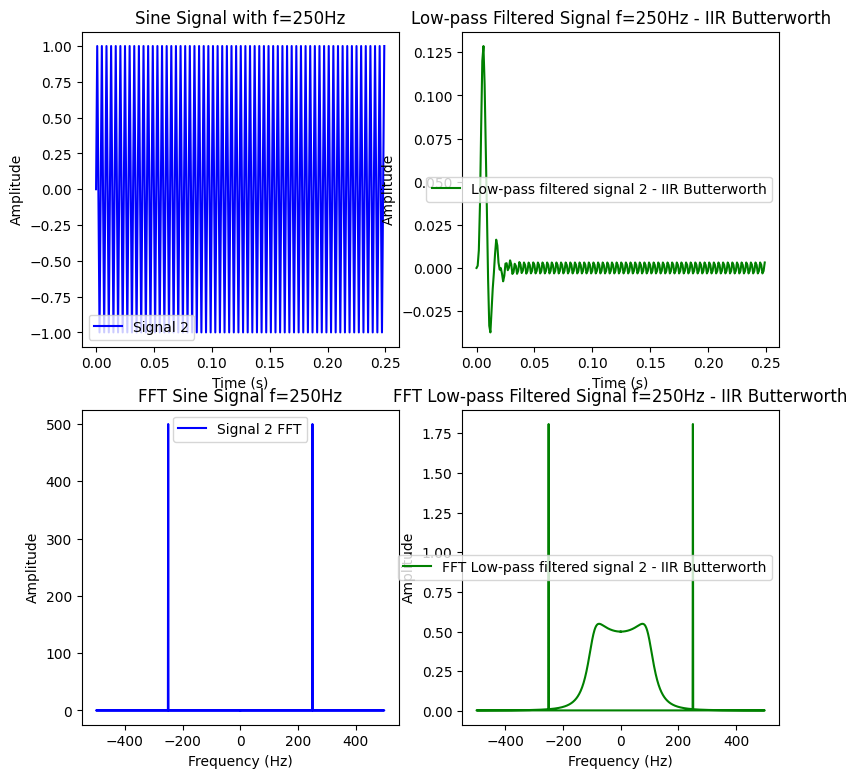

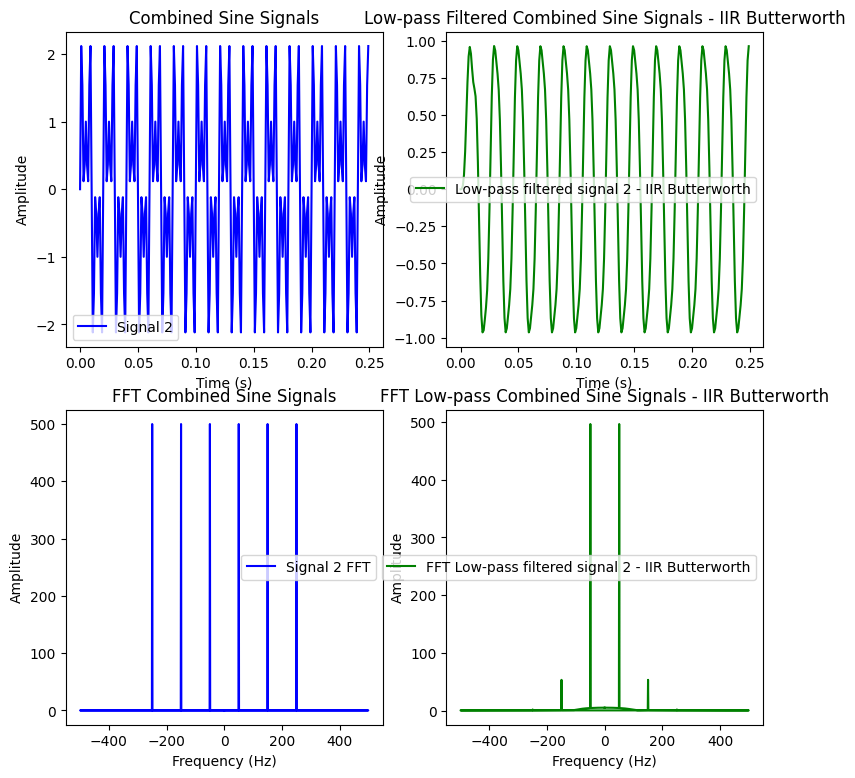

In [7]:

# Frequency axis for FFT plot
N = len(t)
freqs = np.fft.fftfreq(N, d=t[1] - t[0])  # Compute frequency axis

# Define the range of time values you want to plot (start and end indices)
start_index = 0  # Start index of the portion to plot
end_index = 250 # End index of the portion to plot


# Plotting
plt.figure(figsize=(9, 9))


# Signal 2
plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal2[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=150Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_signal2_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - IIR Butterworth')
plt.title('Low-pass Filtered Signal f=150Hz - IIR Butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal2), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=150Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_signal2_lpf), 'g', label='FFT Low-pass filtered signal 2 - IIR Butterworth')
plt.title('FFT Low-pass Filtered Signal f=150Hz - IIR Butterworth')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Signal 2 with noise
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal2_with_noise[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=150Hz w/noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_signal2_with_noise_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - IIR Butterworth')
plt.title('Low-pass Filtered Signal f=150Hz w/noise - IIR Butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal2_with_noise), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=150Hz w/noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_signal2_with_noise_lpf), 'g', label='FFT Low-pass filtered signal 2 - IIR Butterworth')
plt.title('FFT Low-pass Filtered Signal f=150Hz w/ noise - IIR Butterworth')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Signal 3
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal3[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=250Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_signal3_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - IIR Butterworth')
plt.title('Low-pass Filtered Signal f=250Hz - IIR Butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal3), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=250Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_signal3_lpf), 'g', label='FFT Low-pass filtered signal 2 - IIR Butterworth')
plt.title('FFT Low-pass Filtered Signal f=250Hz - IIR Butterworth')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Combined signal
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], combined_signal[start_index:end_index], 'b', label='Signal 2')
plt.title('Combined Sine Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_combined_signal_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - IIR Butterworth')
plt.title('Low-pass Filtered Combined Sine Signals - IIR Butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_combined_signal), 'b', label='Signal 2 FFT')
plt.title('FFT Combined Sine Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_combined_signal_lpf), 'g', label='FFT Low-pass filtered signal 2 - IIR Butterworth')
plt.title('FFT Low-pass Combined Sine Signals - IIR Butterworth')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

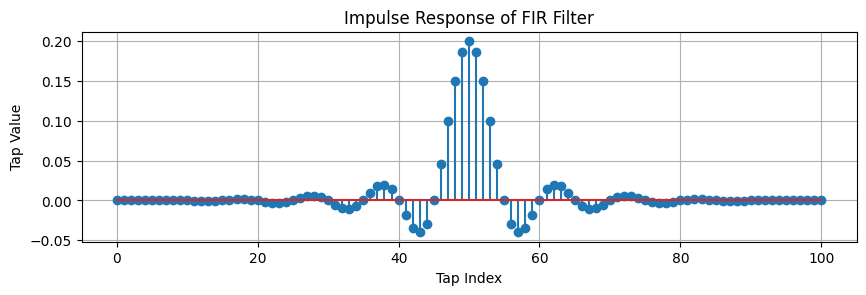

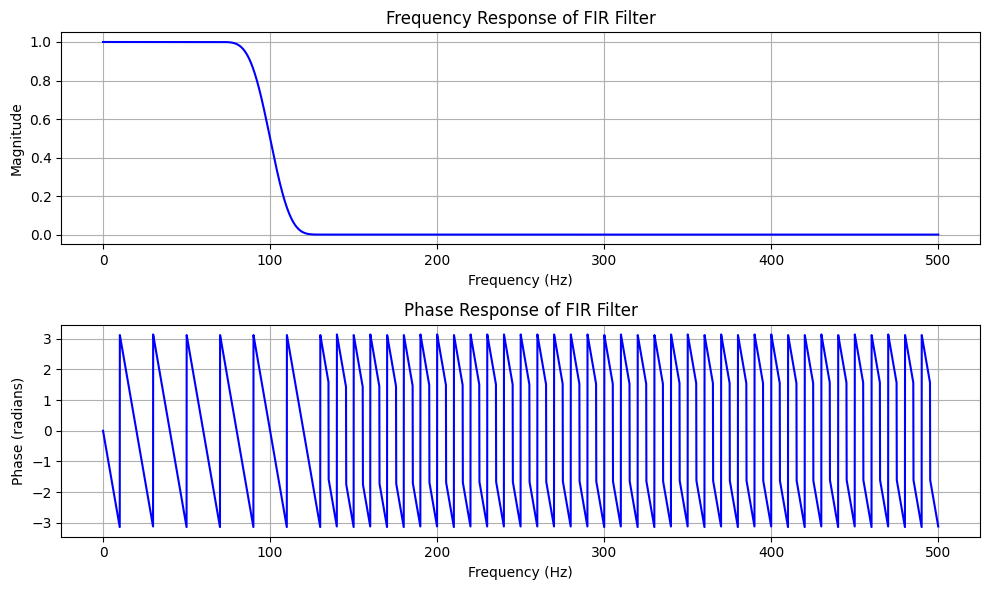

FIR Filter Coefficients/Taps:
[ 1.08192282e-34 -1.35855822e-06 -9.01414109e-06 -2.08586736e-05
 -2.36424739e-05  7.16701129e-20  5.71022038e-05  1.30806087e-04
  1.78120639e-04  1.45558863e-04 -3.13502513e-19 -2.38584181e-04
 -4.82272663e-04 -5.94830668e-04 -4.48486722e-04  7.90413026e-19
  6.49450779e-04  1.24993221e-03  1.47686284e-03  1.07197491e-03
 -1.56521920e-18 -1.45512303e-03 -2.72369571e-03 -3.13760298e-03
 -2.22520467e-03  2.65066568e-18  2.90012038e-03  5.33287792e-03
  6.04489108e-03  4.22506250e-03 -3.97433903e-18 -5.37390359e-03
 -9.78620207e-03 -1.10049630e-02 -7.64562023e-03  5.37283125e-18
  9.67157734e-03  1.76334636e-02  1.99166624e-02  1.39510183e-02
 -6.62066011e-18 -1.82149362e-02 -3.40946088e-02 -3.99334515e-02
 -2.94109503e-02  7.48617855e-18  4.55752887e-02  9.94462098e-02
  1.50382960e-01  1.86788809e-01  1.99993122e-01  1.86788809e-01
  1.50382960e-01  9.94462098e-02  4.55752887e-02  7.48617855e-18
 -2.94109503e-02 -3.99334515e-02 -3.40946088e-02 -1.82149362

In [8]:
# FIR filter with Blackman window
num_taps = 101  # Number of filter taps
filter_taps = fir_lowpass(cutoff_freq_lpf, fs, num_taps)

# Plotting impulse response
plt.figure(figsize=(10, 6))

# Plot impulse response
plt.subplot(2, 1, 1)
plt.stem(range(num_taps), filter_taps)
plt.title('Impulse Response of FIR Filter')
plt.xlabel('Tap Index')
plt.ylabel('Tap Value')
plt.grid(True)

# Compute frequency response
w, h = freqz(filter_taps, worN=8000)

# Plotting frequency response
plt.figure(figsize=(10, 6))

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot phase response
plt.subplot(2, 1, 2)
plt.plot(0.5 * fs * w / np.pi, np.angle(h), 'b')
plt.title('Phase Response of FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Print the array of filter taps
print("FIR Filter Coefficients/Taps:")
print(filter_taps)


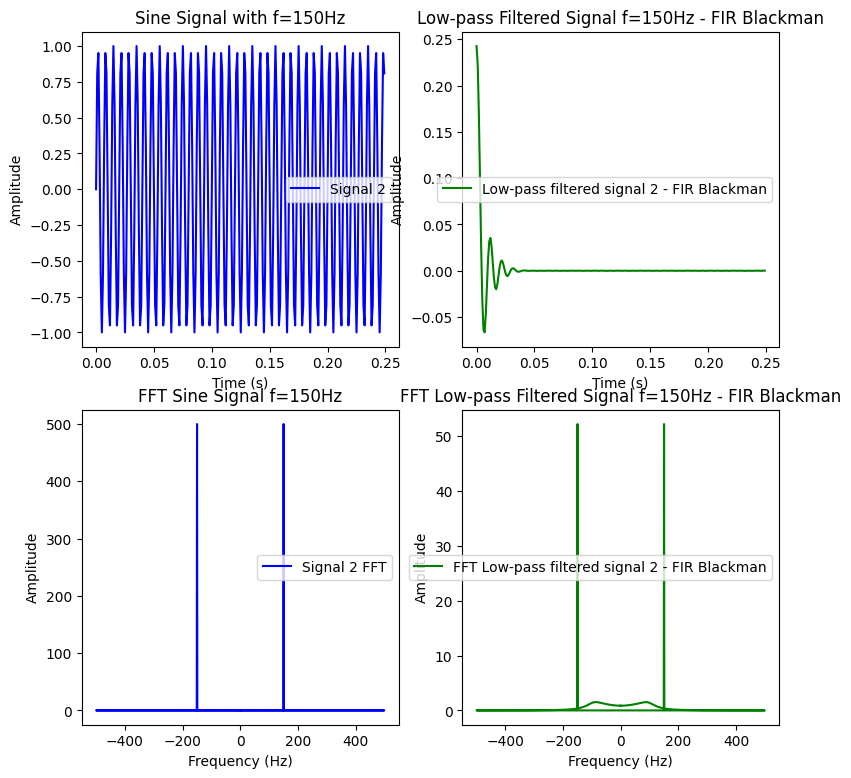

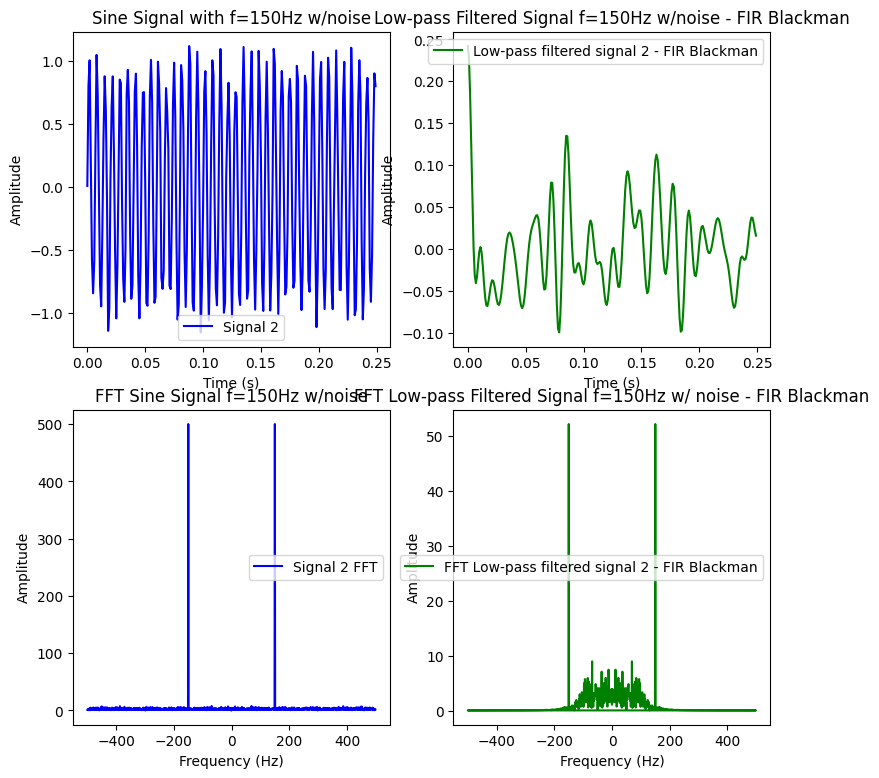

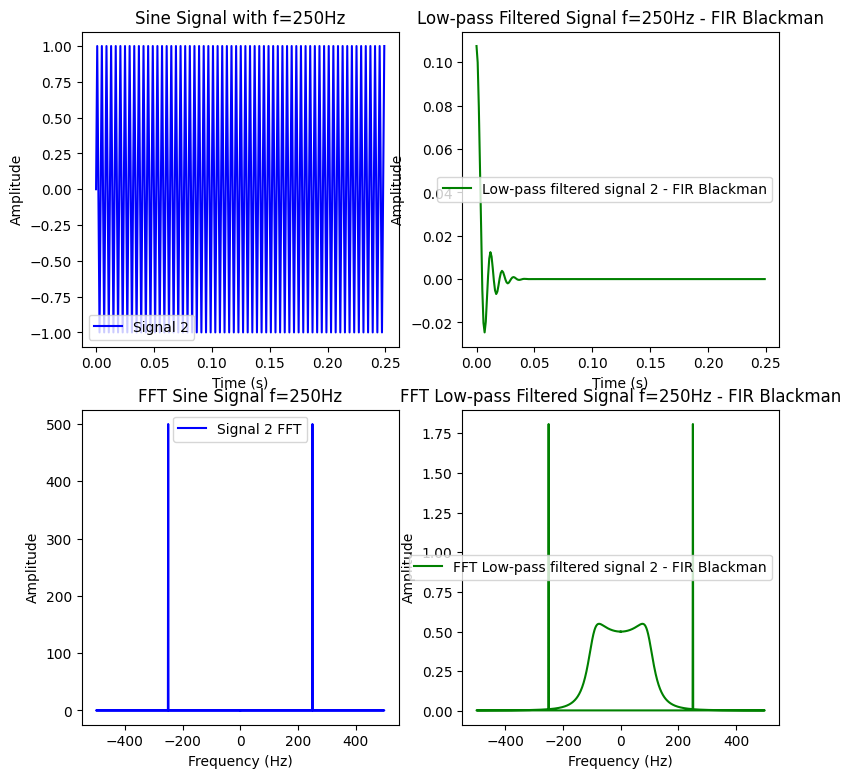

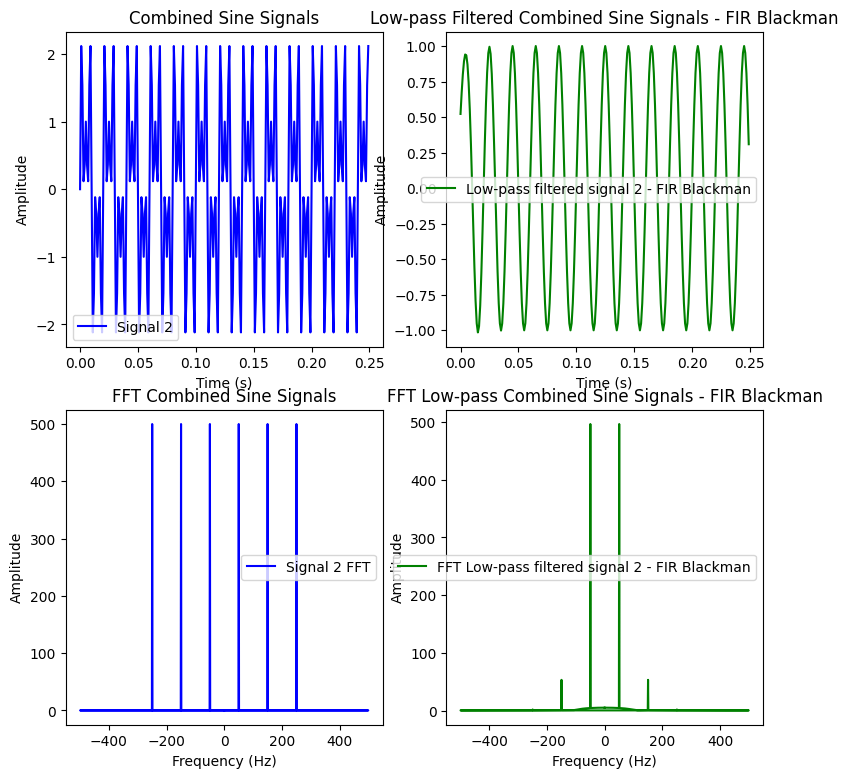

In [9]:
# Apply FIR filter to the signal
fir_filtered_signal2_lpf = fir_lowpass_filter(signal2, filter_taps)
fir_filtered_signal2_with_noise_lpf = fir_lowpass_filter(signal2_with_noise, filter_taps)
fir_filtered_signal3_lpf = fir_lowpass_filter(signal3, filter_taps)
fir_filtered_combined_signal_lpf = fir_lowpass_filter(combined_signal, filter_taps)

# Compute FFT of the filtered signals
fft_fir_filtered_signal2_lpf = np.fft.fft(filtered_signal2_lpf)
fft_fir_filtered_signal2_with_noise_lpf = np.fft.fft(filtered_signal2_with_noise_lpf)
fft_fir_filtered_signal3_lpf = np.fft.fft(filtered_signal3_lpf)
fft_fir_filtered_combined_signal_lpf = np.fft.fft(filtered_combined_signal_lpf)

# Frequency axis for FFT plot
N = len(t)
freqs = np.fft.fftfreq(N, d=t[1] - t[0])  # Compute frequency axis

# Define the range of time values you want to plot (start and end indices)
start_index = 0  # Start index of the portion to plot
end_index = 250 # End index of the portion to plot


# Plotting
plt.figure(figsize=(9, 9))


# Signal 2
plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal2[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=150Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], fir_filtered_signal2_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - FIR Blackman')
plt.title('Low-pass Filtered Signal f=150Hz - FIR Blackman')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal2), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=150Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_fir_filtered_signal2_lpf), 'g', label='FFT Low-pass filtered signal 2 - FIR Blackman')
plt.title('FFT Low-pass Filtered Signal f=150Hz - FIR Blackman')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Signal 2 with noise
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal2_with_noise[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=150Hz w/noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], fir_filtered_signal2_with_noise_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - FIR Blackman')
plt.title('Low-pass Filtered Signal f=150Hz w/noise - FIR Blackman')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal2_with_noise), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=150Hz w/noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_fir_filtered_signal2_with_noise_lpf), 'g', label='FFT Low-pass filtered signal 2 - FIR Blackman')
plt.title('FFT Low-pass Filtered Signal f=150Hz w/ noise - FIR Blackman')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Signal 3
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal3[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=250Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], fir_filtered_signal3_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - FIR Blackman')
plt.title('Low-pass Filtered Signal f=250Hz - FIR Blackman')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal3), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=250Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_fir_filtered_signal3_lpf), 'g', label='FFT Low-pass filtered signal 2 - FIR Blackman')
plt.title('FFT Low-pass Filtered Signal f=250Hz - FIR Blackman')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Combined signal
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], combined_signal[start_index:end_index], 'b', label='Signal 2')
plt.title('Combined Sine Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], fir_filtered_combined_signal_lpf[start_index:end_index],'g', label='Low-pass filtered signal 2 - FIR Blackman')
plt.title('Low-pass Filtered Combined Sine Signals - FIR Blackman')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_combined_signal), 'b', label='Signal 2 FFT')
plt.title('FFT Combined Sine Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_fir_filtered_combined_signal_lpf), 'g', label='FFT Low-pass filtered signal 2 - FIR Blackman')
plt.title('FFT Low-pass Combined Sine Signals - FIR Blackman')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

**Filtering - High Pass**

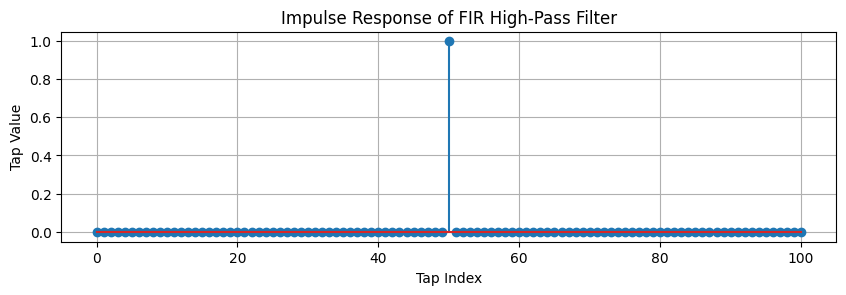

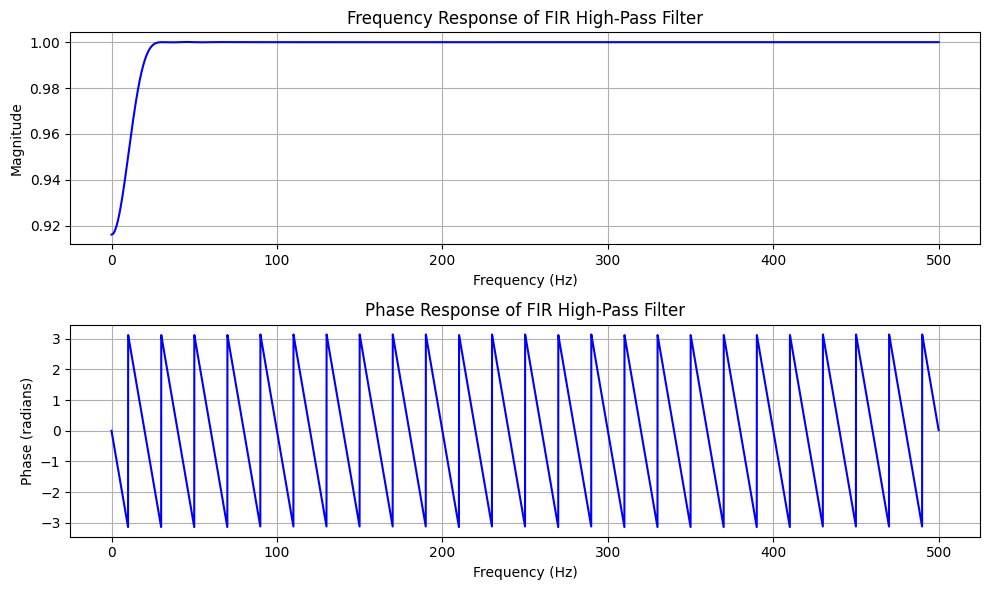

FIR High-Pass Filter Coefficients/Taps:
[ 2.73012625e-20 -7.00434748e-07 -2.81546551e-06 -6.38325600e-06
 -1.14647181e-05 -1.81422030e-05 -2.65176662e-05 -3.67103375e-05
 -4.88539354e-05 -6.30934724e-05 -7.95817067e-05 -9.84753006e-05
 -1.19930753e-04 -1.44100174e-04 -1.71126985e-04 -2.01141598e-04
 -2.34257184e-04 -2.70565578e-04 -3.10133402e-04 -3.52998494e-04
 -3.99166681e-04 -4.48608991e-04 -5.01259327e-04 -5.57012680e-04
 -6.15723898e-04 -6.77207060e-04 -7.41235468e-04 -8.07542268e-04
 -8.75821712e-04 -9.45731041e-04 -1.01689298e-03 -1.08889882e-03
 -1.16131203e-03 -1.23367238e-03 -1.30550051e-03 -1.37630289e-03
 -1.44557704e-03 -1.51281710e-03 -1.57751945e-03 -1.63918849e-03
 -1.69734239e-03 -1.75151878e-03 -1.80128022e-03 -1.84621952e-03
 -1.88596466e-03 -1.92018334e-03 -1.94858708e-03 -1.97093477e-03
 -1.98703571e-03 -1.99675194e-03  9.98000000e-01 -1.99675194e-03
 -1.98703571e-03 -1.97093477e-03 -1.94858708e-03 -1.92018334e-03
 -1.88596466e-03 -1.84621952e-03 -1.80128022e-03 -

In [10]:
# FIR high-pass filter with Blackman window
num_taps = 101  # Number of filter taps
filter_taps = fir_highpass(cutoff_freq_hpf, fs, num_taps)

# Plotting impulse response
plt.figure(figsize=(10, 6))

# Plot impulse response
plt.subplot(2, 1, 1)
plt.stem(range(num_taps), filter_taps)
plt.title('Impulse Response of FIR High-Pass Filter')
plt.xlabel('Tap Index')
plt.ylabel('Tap Value')
plt.grid(True)

# Compute frequency response
w, h = freqz(filter_taps, worN=8000)

# Plotting frequency response
plt.figure(figsize=(10, 6))

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of FIR High-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot phase response
plt.subplot(2, 1, 2)
plt.plot(0.5 * fs * w / np.pi, np.angle(h), 'b')
plt.title('Phase Response of FIR High-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the array of filter taps
print("FIR High-Pass Filter Coefficients/Taps:")
print(filter_taps)

**Filtering - Notch/Band-stop**

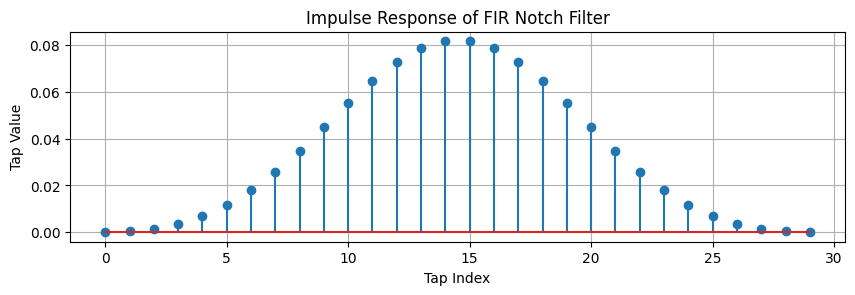

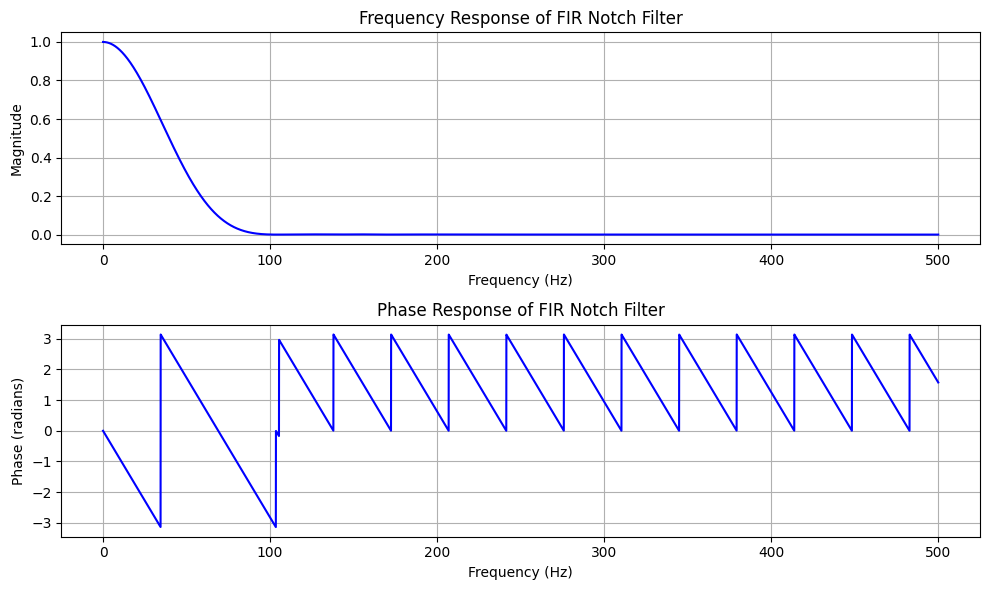

FIR Notch Filter Coefficients/Taps:
[-1.13935024e-18  3.52678661e-04  1.47805827e-03  3.55951474e-03
  6.84425828e-03  1.15680899e-02  1.78723981e-02  2.57305826e-02
  3.48997244e-02  4.49089254e-02  5.50891196e-02  6.46415207e-02
  7.27346365e-02  7.86142852e-02  8.17083189e-02  8.17083189e-02
  7.86142852e-02  7.27346365e-02  6.46415207e-02  5.50891196e-02
  4.49089254e-02  3.48997244e-02  2.57305826e-02  1.78723981e-02
  1.15680899e-02  6.84425828e-03  3.55951474e-03  1.47805827e-03
  3.52678661e-04 -1.13935024e-18]


In [11]:
# Notch filter with Hamming window
num_taps = 30  # Number of filter taps
filter_taps = notch(cutoff_freq_notch, fs, num_taps)

# Plotting impulse response
plt.figure(figsize=(10, 6))

# Plot impulse response
plt.subplot(2, 1, 1)
plt.stem(range(num_taps), filter_taps)
plt.title('Impulse Response of FIR Notch Filter')
plt.xlabel('Tap Index')
plt.ylabel('Tap Value')
plt.grid(True)

# Compute frequency response
w, h = freqz(filter_taps, worN=8000)

# Plotting frequency response
plt.figure(figsize=(10, 6))

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of FIR Notch Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot phase response
plt.subplot(2, 1, 2)
plt.plot(0.5 * fs * w / np.pi, np.angle(h), 'b')
plt.title('Phase Response of FIR Notch Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the array of filter taps
print("FIR Notch Filter Coefficients/Taps:")
print(filter_taps)

In [12]:
# Apply notch filter to signals
filtered_signal1_notch = notch_filter(signal1, filter_taps)
filtered_signal2_notch = notch_filter(signal2, filter_taps)
filtered_combined_signal_notch = notch_filter(combined_signal, filter_taps)

# Compute FFT of the filtered signals
fft_filtered_signal1_notch = np.fft.fft(filtered_signal1_notch)
fft_filtered_signal2_notch = np.fft.fft(filtered_signal2_notch)
fft_filtered_combined_signal_notch = np.fft.fft(filtered_combined_signal_notch)

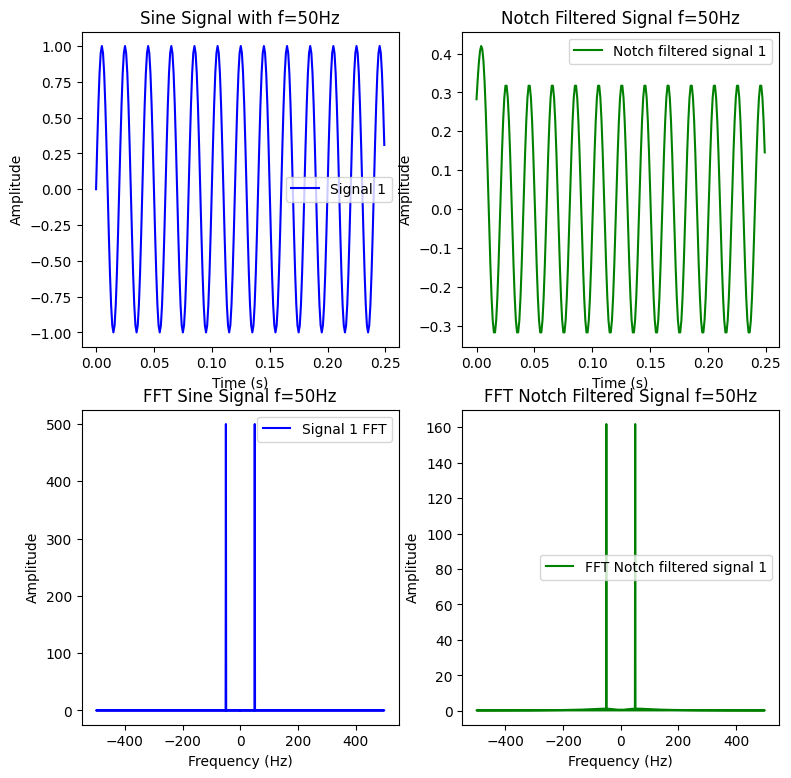

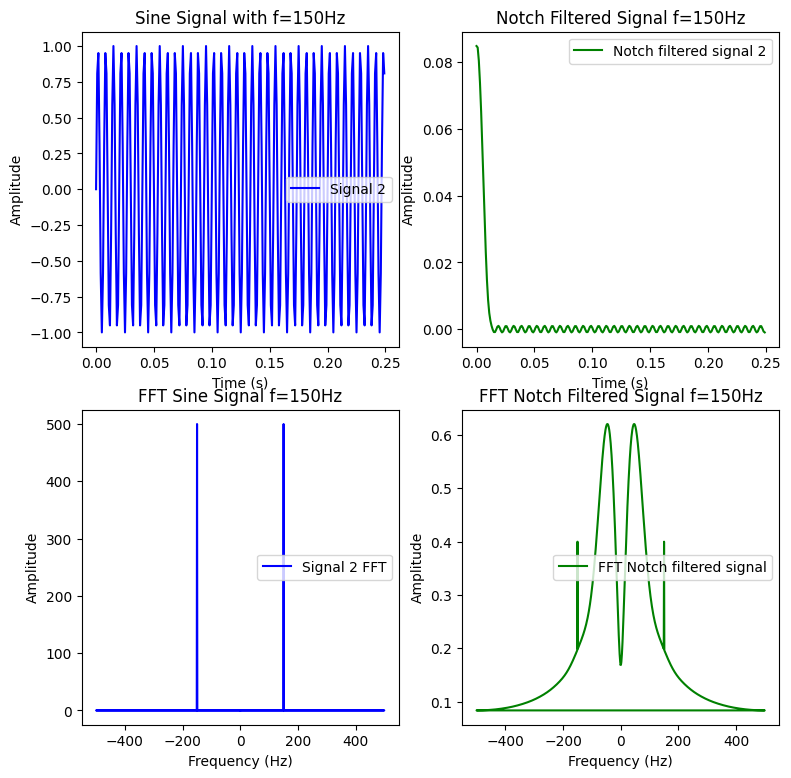

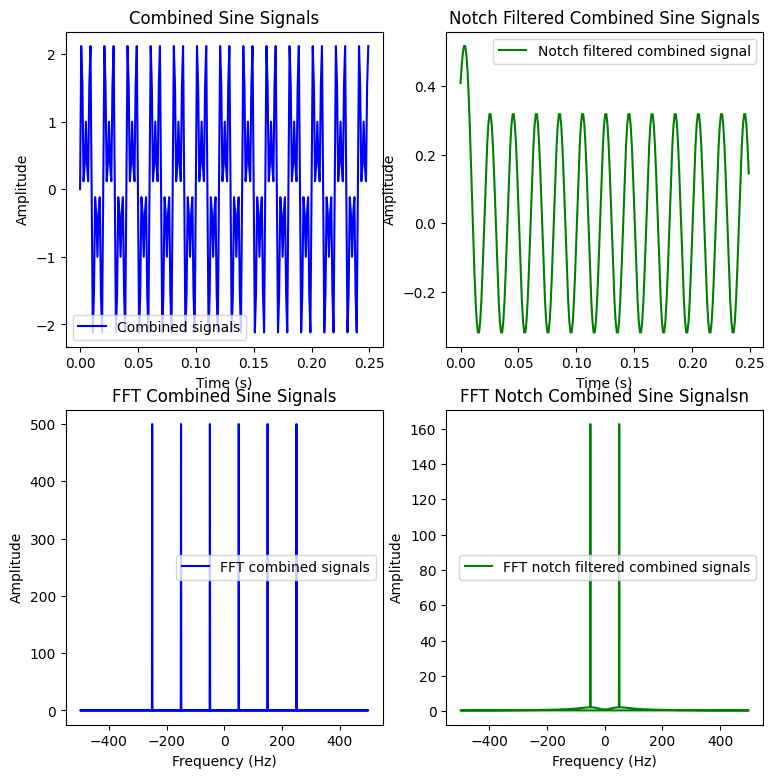

In [13]:
N = len(t)
freqs = np.fft.fftfreq(N, d=t[1] - t[0])  # Compute frequency axis

# Define the range of time values you want to plot (start and end indices)
start_index = 0  # Start index of the portion to plot
end_index = 250 # End index of the portion to plot


# Plotting
plt.figure(figsize=(9, 9))


# Signal 1
plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal1[start_index:end_index], 'b', label='Signal 1')
plt.title('Sine Signal with f=50Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_signal1_notch[start_index:end_index],'g', label='Notch filtered signal 1')
plt.title('Notch Filtered Signal f=50Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal1), 'b', label='Signal 1 FFT')
plt.title('FFT Sine Signal f=50Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_signal1_notch), 'g', label='FFT Notch filtered signal 1')
plt.title('FFT Notch Filtered Signal f=50Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()


# Signal 2
plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], signal2[start_index:end_index], 'b', label='Signal 2')
plt.title('Sine Signal with f=150Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_signal2_notch[start_index:end_index],'g', label='Notch filtered signal 2')
plt.title('Notch Filtered Signal f=150Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_signal2), 'b', label='Signal 2 FFT')
plt.title('FFT Sine Signal f=150Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_signal2_notch), 'g', label='FFT Notch filtered signal')
plt.title('FFT Notch Filtered Signal f=150Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()



# Combined signal
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.plot(t[start_index:end_index], combined_signal[start_index:end_index], 'b', label='Combined signals')
plt.title('Combined Sine Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t[start_index:end_index], filtered_combined_signal_notch[start_index:end_index],'g', label='Notch filtered combined signal')
plt.title('Notch Filtered Combined Sine Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(freqs, np.abs(fft_combined_signal), 'b', label='FFT combined signals')
plt.title('FFT Combined Sine Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freqs, np.abs(fft_filtered_combined_signal_notch), 'g', label='FFT notch filtered combined signals')
plt.title('FFT Notch Combined Sine Signalsn')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()